In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import datetime

In [3]:
aug = pd.read_csv('311_8-01_to_8-31function.csv')

In [4]:
aug.tail()

,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,...,open_data_channel_type,park_borough,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
176010,NaN,NYPD,New York City Police Department,2.028771e+09,BRONX,BRONX,2019-08-31T07:23:09.000,05 BRONX,Noise - Street/Sidewalk,2019-08-30T23:59:24.000,...,PHONE,BRONX,Unspecified,2019-08-31T11:23:14.000,The Police Department responded to the complai...,Closed,WEST TREMONT AVENUE,43678664,1007162.0,249724.0
176011,NaN,NYPD,New York City Police Department,4.088410e+09,QUEENS,WOODHAVEN,2019-08-31T02:55:47.000,09 QUEENS,Noise - Residential,2019-08-30T23:59:29.000,...,PHONE,QUEENS,Unspecified,2019-08-31T06:55:56.000,The Police Department responded to the complai...,Closed,86 AVENUE,43678521,1021651.0,191874.0
176012,NaN,NYPD,New York City Police Department,NaN,BROOKLYN,BROOKLYN,2019-08-31T04:51:15.000,14 BROOKLYN,Noise - Residential,2019-08-30T23:59:35.000,...,PHONE,BROOKLYN,Unspecified,2019-08-31T08:51:34.000,The Police Department responded to the complai...,Closed,AVENUE D,43685124,996710.0,172642.0
176013,NaN,NYPD,New York City Police Department,3.044530e+09,BROOKLYN,BROOKLYN,2019-08-31T02:47:46.000,05 BROOKLYN,Noise - Residential,2019-08-30T23:59:38.000,...,PHONE,BROOKLYN,Unspecified,2019-08-31T06:47:59.000,The Police Department responded to the complai...,Closed,SHEPHERD AVENUE,43682601,1018082.0,182051.0
176014,INTERSECTION,DOT,Department of Transportation,NaN,MANHATTAN,NaN,2019-08-31T00:25:00.000,Unspecified MANHATTAN,Traffic Signal Condition,2019-08-31T00:00:00.000,...,UNKNOWN,MANHATTAN,Unspecified,2019-08-31T00:25:00.000,Service Request status for this request is ava...,Closed,NaN,43678985,NaN,NaN


In [67]:
aug.columns

Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough', 'city',
       'closed_date', 'community_board', 'complaint_type', 'created_date',
       'cross_street_1', 'cross_street_2', 'descriptor', 'facility_type',
       'incident_address', 'incident_zip', 'intersection_street_1',
       'intersection_street_2', 'landmark', 'latitude', 'location',
       'location_address', 'location_city', 'location_state', 'location_type',
       'location_zip', 'longitude', 'open_data_channel_type', 'park_borough',
       'park_facility_name', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name', 'unique_key',
       'x_coordinate_state_plane', 'y_coordinate_state_plane', 'day_of_week'],
      dtype='object')

In [158]:
len(aug.columns)

38

In [155]:
aug.describe()

,bbl,incident_zip,latitude,location_address,location_city,location_state,location_zip,longitude,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
count,1.440190e+05,170546.000000,169019.000000,0.0,0.0,0.0,0.0,169019.000000,1.760150e+05,1.690190e+05,169019.000000
mean,2.841836e+09,10851.261583,40.725742,NaN,NaN,NaN,NaN,-73.923361,4.356163e+07,1.005482e+06,203704.498530
std,1.183381e+09,541.363382,0.083938,NaN,NaN,NaN,NaN,0.083567,7.306620e+04,2.317352e+04,30580.640236
min,0.000000e+00,10000.000000,40.499018,NaN,NaN,NaN,NaN,-74.253920,4.342697e+07,9.136390e+05,121175.000000
25%,2.029010e+09,10451.000000,40.668097,NaN,NaN,NaN,NaN,-73.970172,4.349977e+07,9.925220e+05,182696.000000
50%,3.031830e+09,11207.000000,40.716555,NaN,NaN,NaN,NaN,-73.926928,4.356213e+07,1.004500e+06,200356.000000
75%,4.019100e+09,11237.000000,40.789813,NaN,NaN,NaN,NaN,-73.873553,4.362485e+07,1.019288e+06,227046.000000
max,5.240010e+09,12345.000000,40.912828,NaN,NaN,NaN,NaN,-73.701430,4.492027e+07,1.066980e+06,271861.000000


In [156]:
aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176015 entries, 0 to 176014
Data columns (total 38 columns):
address_type                      66346 non-null object
agency                            176015 non-null object
agency_name                       176015 non-null object
bbl                               144019 non-null float64
borough                           176015 non-null object
city                              158644 non-null object
closed_date                       162242 non-null object
community_board                   176015 non-null object
complaint_type                    176015 non-null object
created_date                      176015 non-null datetime64[ns]
cross_street_1                    141332 non-null object
cross_street_2                    141273 non-null object
descriptor                        172431 non-null object
facility_type                     5835 non-null object
incident_address                  164091 non-null object
incident_zip                

In [6]:
aug['created_date'] = pd.to_datetime(aug['created_date'])
aug["day_of_week"] = aug['created_date'].dt.day_name()

In [164]:
aug['created_date'][9000]

Timestamp('2019-08-02 13:50:00')

In [165]:
aug['day_of_week'][9000]

'Friday'

In [7]:
aug.day_of_week.value_counts()

Friday       30036
Thursday     29316
Monday       24483
Tuesday      24179
Saturday     23311
Wednesday    22964
Sunday       21726
Name: day_of_week, dtype: int64

### borough by day

In [143]:
aug.loc[aug.borough=='BROOKLYN'].day_of_week.value_counts()
# aug.loc[aug.borough=='BROOKLYN'].day_of_week.count()
# [aug.day_of_week.value_counts()]

Friday       9586
Thursday     9340
Monday       7698
Tuesday      7692
Wednesday    7445
Saturday     7238
Sunday       6711
Name: day_of_week, dtype: int64

In [144]:
bor_days = aug.loc[aug.borough=='BROOKLYN'].day_of_week.value_counts()

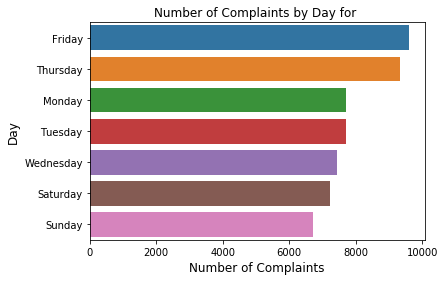

In [150]:
sns.barplot(bor_days.values, bor_days.index)
plt.title('Number of Complaints by Day for ')
plt.ylabel('Day', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

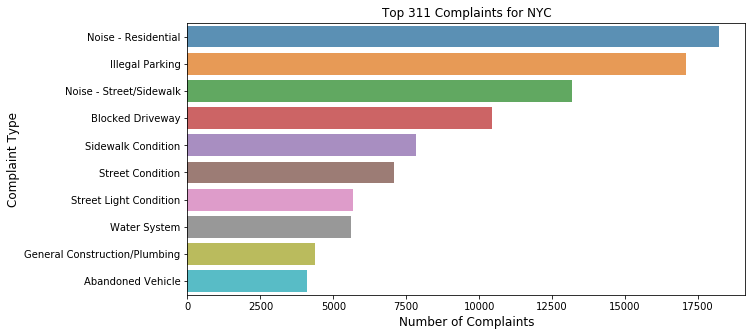

In [34]:
complaint_count  = aug['complaint_type'].value_counts()
complaint_count = complaint_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top 311 Complaints for NYC')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

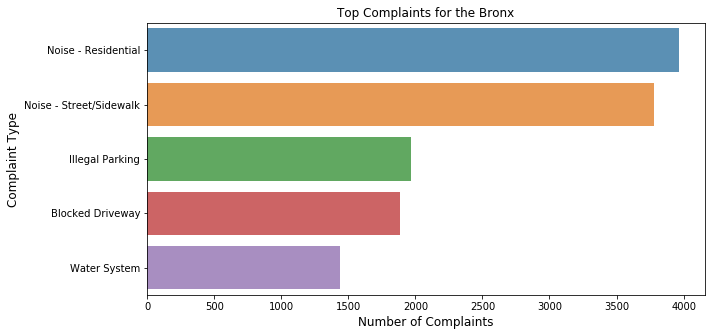

In [9]:
complaint_count  = aug['complaint_type'][aug['borough']=='BRONX'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for the Bronx')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

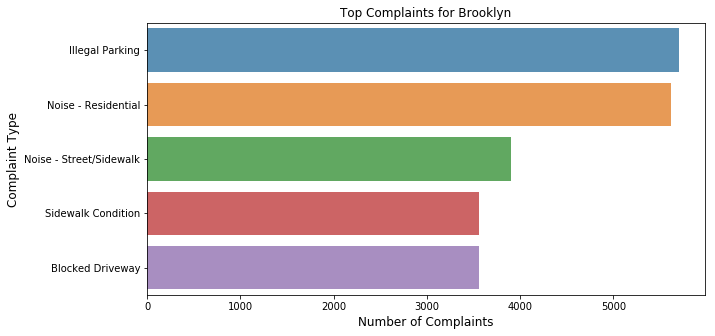

In [25]:
complaint_count  = aug['complaint_type'][aug['borough']=='BROOKLYN'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Brooklyn')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

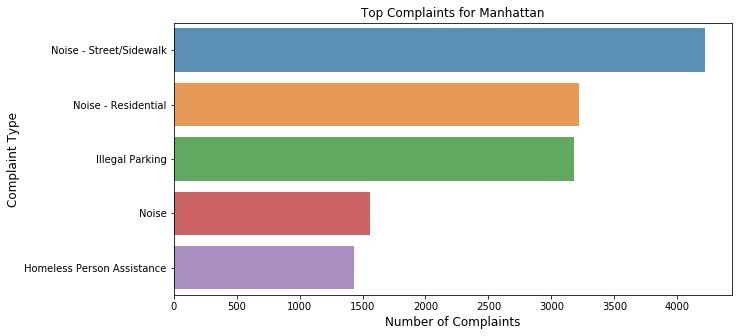

In [26]:
complaint_count  = aug['complaint_type'][aug['borough']=='MANHATTAN'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Manhattan')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

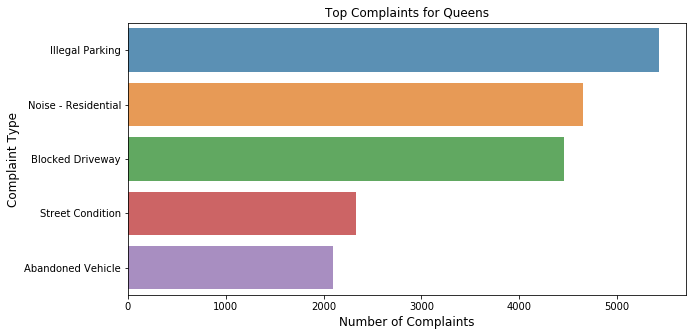

In [27]:
complaint_count  = aug['complaint_type'][aug['borough']=='QUEENS'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Queens')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

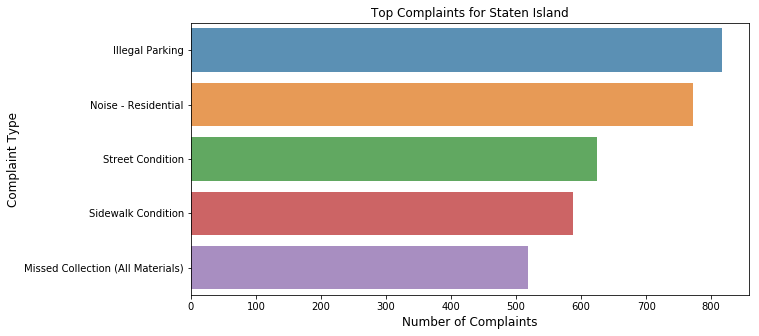

In [28]:
complaint_count  = aug['complaint_type'][aug['borough']=='STATEN ISLAND'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Staten Island')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

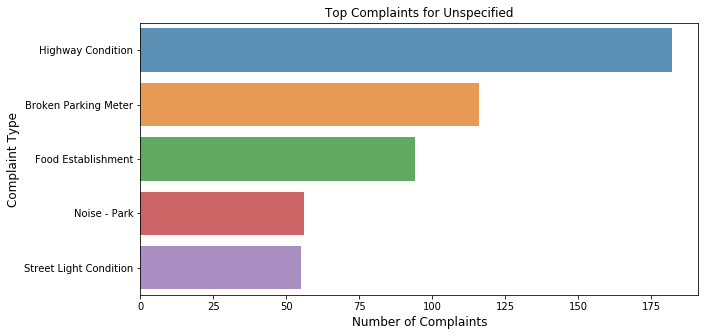

In [29]:
complaint_count  = aug['complaint_type'][aug['borough']=='Unspecified'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Unspecified')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

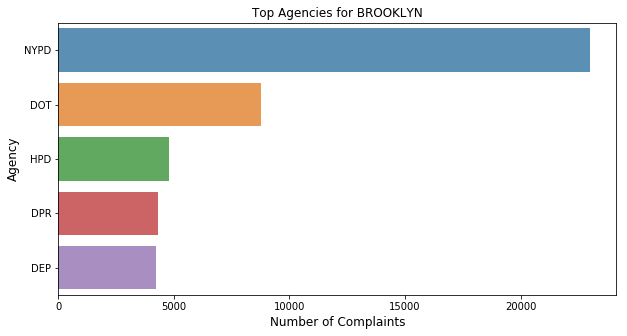

In [35]:
complaint_count  = aug['agency'][aug['borough']=='BROOKLYN'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Agencies for BROOKLYN')
plt.ylabel('Agency', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

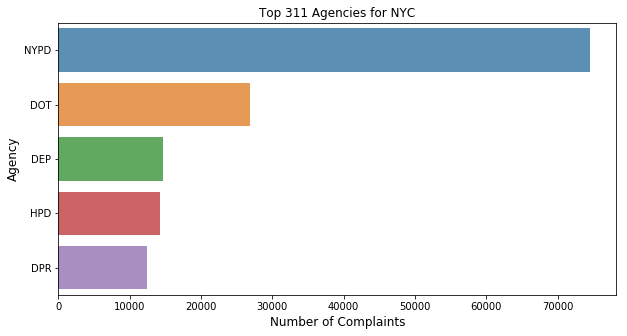

In [36]:

complaint_count  = aug['agency'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top 311 Agencies for NYC')
plt.ylabel('Agency', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

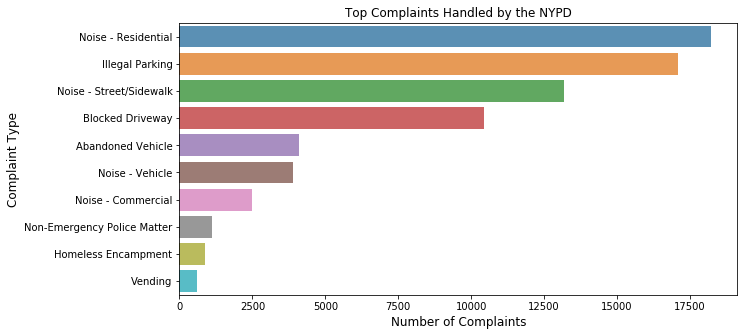

In [37]:
complaint_count  = aug['complaint_type'][aug['agency']=='NYPD'].value_counts()
complaint_count = complaint_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints Handled by the NYPD')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

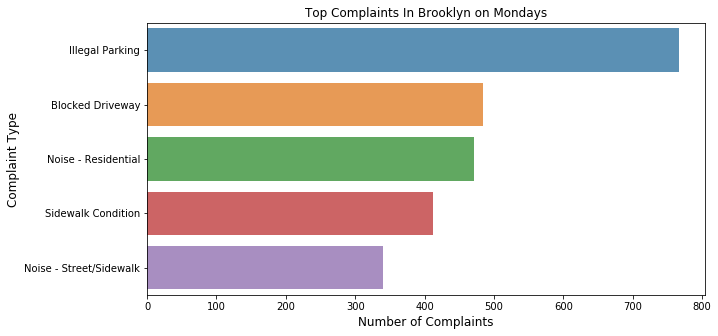

In [49]:
# complaint_count  = aug['complaint_type'][aug['day_of_week']=='Monday'].value_counts()
complaint_count  = aug['complaint_type'][aug['borough']=='BROOKLYN'][aug['day_of_week']=='Monday'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints In Brooklyn on Mondays')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

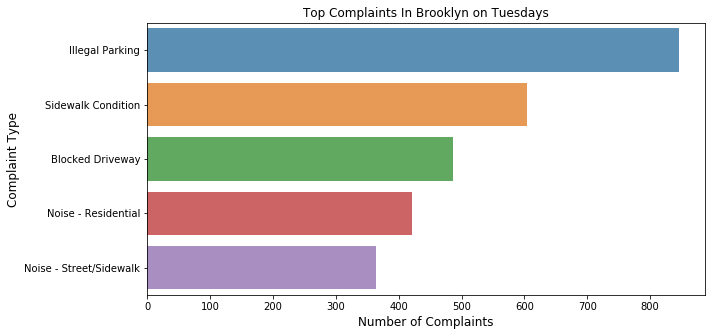

In [50]:
# complaint_count  = aug['complaint_type'][aug['day_of_week']=='Monday'].value_counts()
complaint_count  = aug['complaint_type'][aug['borough']=='BROOKLYN'][aug['day_of_week']=='Tuesday'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints In Brooklyn on Tuesdays')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

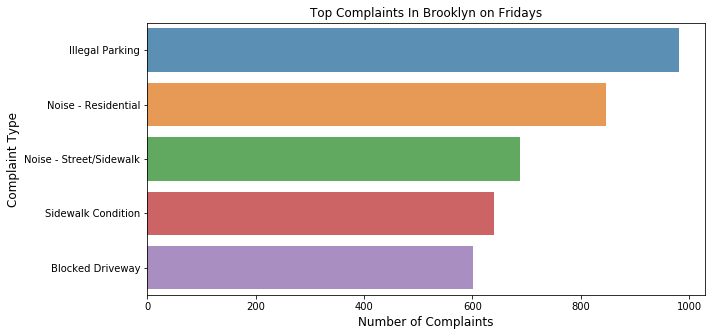

In [51]:
# complaint_count  = aug['complaint_type'][aug['day_of_week']=='Monday'].value_counts()
complaint_count  = aug['complaint_type'][aug['borough']=='BROOKLYN'][aug['day_of_week']=='Friday'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints In Brooklyn on Fridays')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

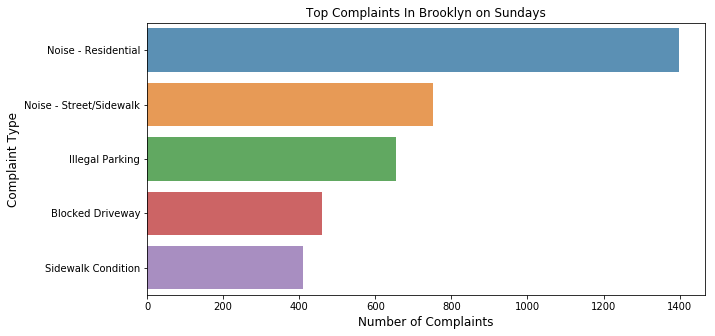

In [52]:
# complaint_count  = aug['complaint_type'][aug['day_of_week']=='Monday'].value_counts()
complaint_count  = aug['complaint_type'][aug['borough']=='BROOKLYN'][aug['day_of_week']=='Sunday'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints In Brooklyn on Sundays')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

In [55]:
aug.open_data_channel_type.value_counts()

PHONE      63071
ONLINE     41663
UNKNOWN    39903
MOBILE     31373
OTHER          5
Name: open_data_channel_type, dtype: int64

In [61]:
print(aug.groupby(['borough', 'open_data_channel_type']).borough.count().unstack())

open_data_channel_type   MOBILE   ONLINE  OTHER    PHONE  UNKNOWN
borough                                                          
BRONX                    4762.0   7685.0    2.0  11650.0   5859.0
BROOKLYN                11431.0  13057.0    1.0  19251.0  11970.0
MANHATTAN                6699.0   9879.0    1.0  10028.0   8083.0
QUEENS                   7421.0   8954.0    1.0  18267.0  10836.0
STATEN ISLAND            1060.0   1763.0    NaN   3526.0   2864.0
Unspecified                 NaN    325.0    NaN    349.0    291.0


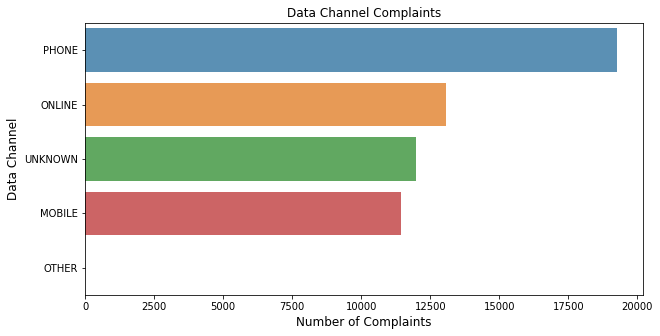

In [117]:
# complaint_count  = aug['complaint_type'][aug['day_of_week']=='Monday'].value_counts()
complaint_count  = aug['open_data_channel_type'][aug['borough']=='BROOKLYN'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Data Channel Complaints')
plt.ylabel('Data Channel', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

In [65]:
print(aug.groupby(['borough','day_of_week']).borough.count().unstack())
pclass = aug.groupby(['borough','day_of_week']).borough.count().unstack()


day_of_week    Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
borough                                                                      
BRONX            4917    4163      4317    4066      4821     3969       3705
BROOKLYN         9586    7698      7238    6711      9340     7692       7445
MANHATTAN        6011    4820      4746    4281      5751     4671       4410
QUEENS           7806    6381      5789    5630      7552     6427       5894
STATEN ISLAND    1572    1292      1132     941      1671     1261       1344
Unspecified       144     129        89      97       181      159        166


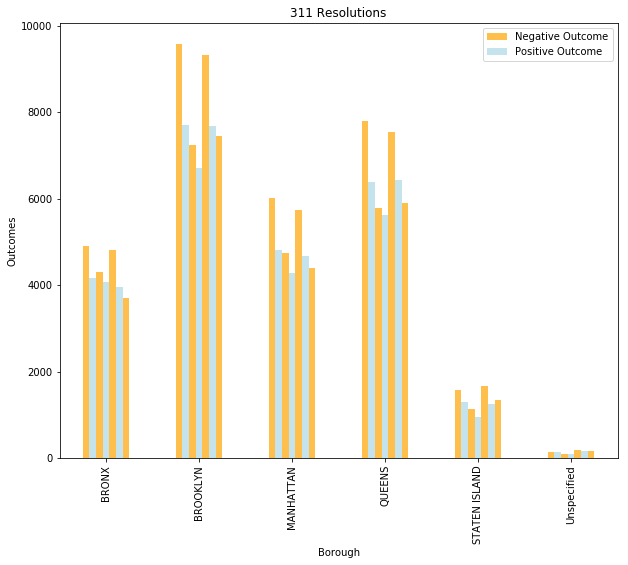

In [66]:
p1 = pclass.plot(kind = 'bar', stacked = False, 
                   title = '311 Resolutions', 
                   color = ['orange','lightblue'], alpha = .70,figsize = (10,8))
p1.set_xlabel('Borough')
p1.set_ylabel('Outcomes')
p1.legend(['Negative Outcome','Positive Outcome'])
plt.show()

In [188]:
print(aug.groupby(['day_of_week', 'borough'], sort=False).day_of_week.count().unstack())
pclass = aug.groupby(['day_of_week', 'borough'], sort=False).day_of_week.count().unstack()


borough      STATEN ISLAND  QUEENS  MANHATTAN  BROOKLYN  BRONX  Unspecified
day_of_week                                                                
Thursday              1671    7552       5751      9340   4821          181
Friday                1572    7806       6011      9586   4917          144
Saturday              1132    5789       4746      7238   4317           89
Sunday                 941    5630       4281      6711   4066           97
Monday                1292    6381       4820      7698   4163          129
Tuesday               1261    6427       4671      7692   3969          159
Wednesday             1344    5894       4410      7445   3705          166


In [ ]:
friday, brooklyn, queens, manhattan, bronx, staten island, unspecified

4, 1, 3, 2, 5, 6
bronx, brooklyn, manhattan, queens, staten island, unspecified

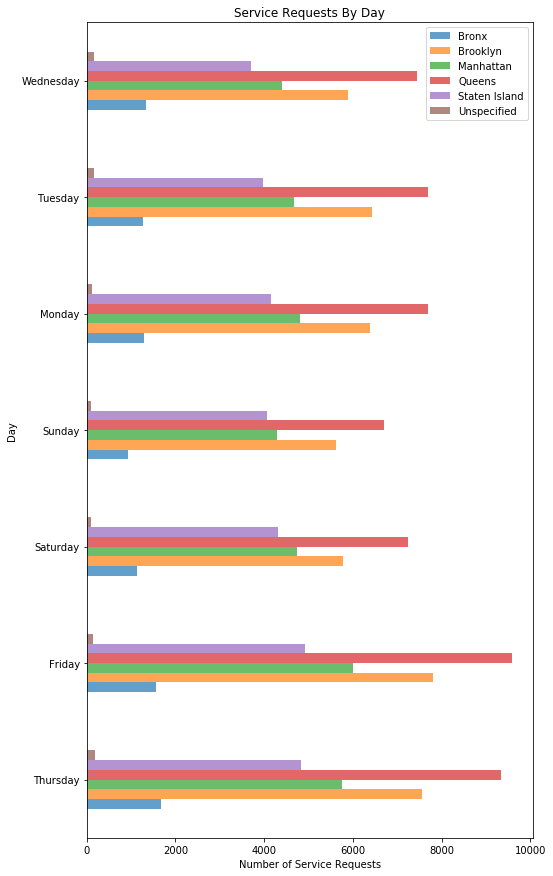

In [189]:
p1 = pclass.plot(kind = 'barh', stacked = False, 
                    title = 'Service Requests By Day', 
#                    color = ['orange','darkblue', 'yellow', 'green', 'red', 'pink'], 
#                     colorscale = 
                    alpha = .70,figsize = (8,15))
p1.set_xlabel('Number of Service Requests')
p1.set_ylabel('Day')
p1.legend(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Unspecified'])
plt.show()

# Function for Borough

In [192]:
def borough_info(THIS):

    #barplot for top 5 complaints
    top5  = aug['complaint_type'][aug['borough']==THIS].value_counts()
    top5 = top5[:5,]
    plt.figure(figsize=(10,5))
    sns.barplot(top5.values, top5.index, alpha=0.8)
    plt.title('Top Complaints in {}'.format(THIS))
    plt.ylabel('Complaint Type', fontsize=12)
    plt.xlabel('Number of Complaints', fontsize=12)
    plt.show()

    #barplot top 5 agencies
    top_agencies  = aug['agency'][aug['borough']==THIS].value_counts()
    top_agencies = top_agencies[:5,]
    plt.figure(figsize=(10,5))
    sns.barplot(top_agencies.values, top_agencies.index, alpha=0.8)
    plt.title('Top Agencies in {}'.format(THIS))
    plt.ylabel('Agency', fontsize=12)
    plt.xlabel('Number of Complaints', fontsize=12)
    plt.show()
    
        #data channel
    # complaint_count  = aug['complaint_type'][aug['day_of_week']=='Monday'].value_counts()
    data_channel  = aug['open_data_channel_type'][aug['borough']==THIS].value_counts()
    data_channel = data_channel[:5,]
    plt.figure(figsize=(10,5))
    sns.barplot(data_channel.values, data_channel.index, alpha=0.8)
    plt.title('Data Channel Complaints in {}'.format(THIS))
    plt.ylabel('Data Channel', fontsize=12)
    plt.xlabel('Number of Complaints', fontsize=12)
    plt.show()
    
    #per day
    bor_days = aug.loc[aug.borough==THIS].day_of_week.value_counts()
    sns.barplot(bor_days.values, bor_days.index)
    plt.title('Number of Complaints by Day for {}'.format(THIS))
    plt.ylabel('Day', fontsize=12)
    plt.xlabel('Number of Complaints', fontsize=12)
    plt.show()

    #day of week
    Days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    for day in Days:
        complaint_count  = aug['complaint_type'][aug['borough']==THIS][aug['day_of_week']==day].value_counts()
        complaint_count = complaint_count[:5,]
        plt.figure(figsize=(10,5))
        sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
        plt.title('Top Complaints in {} on {}'.format(THIS, day))
#         plt.title('f model: T=%str' %day)
        plt.ylabel('Complaint Type', fontsize=12)
        plt.xlabel('Number of Complaints', fontsize=12)
        plt.show()


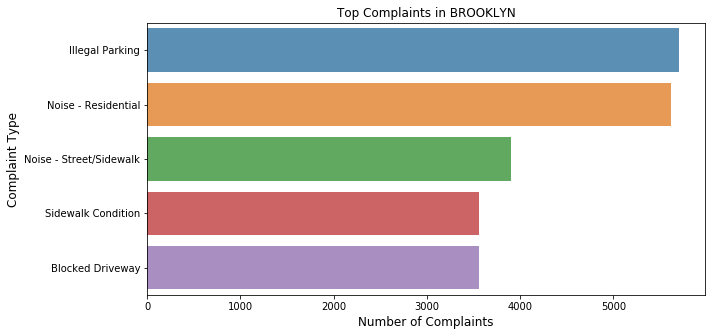

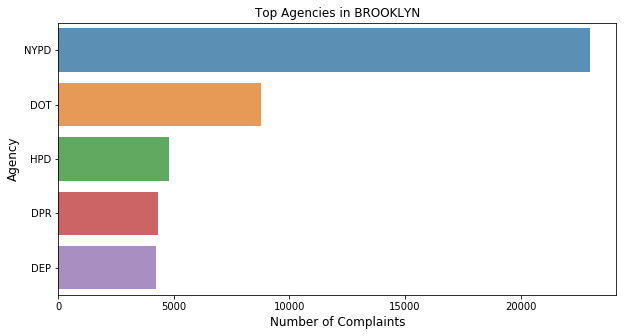

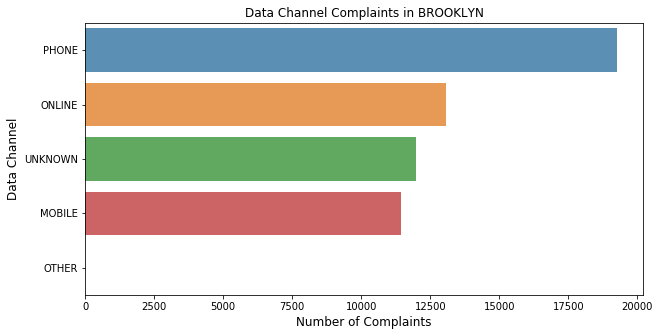

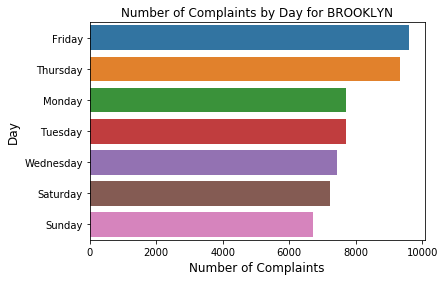

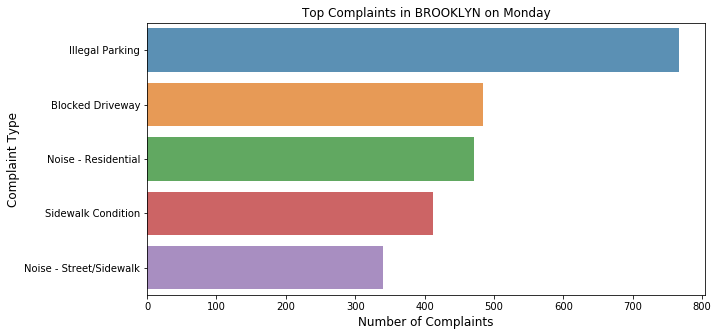

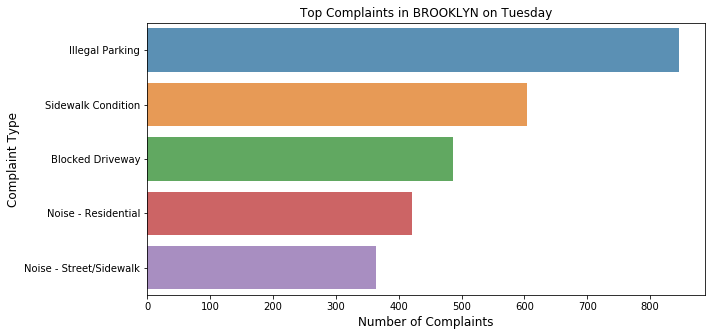

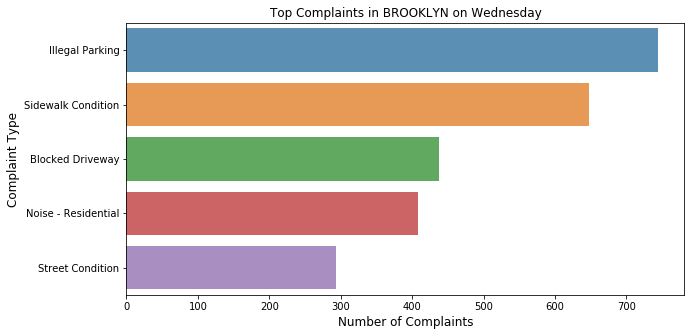

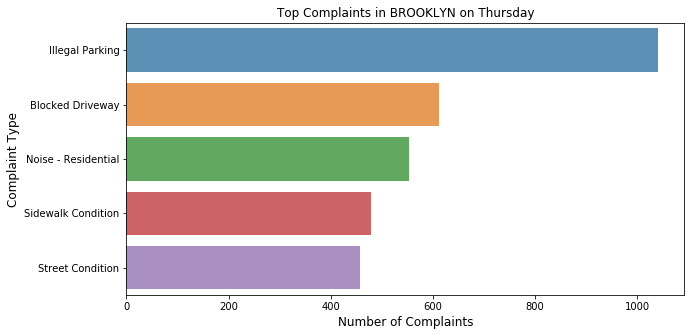

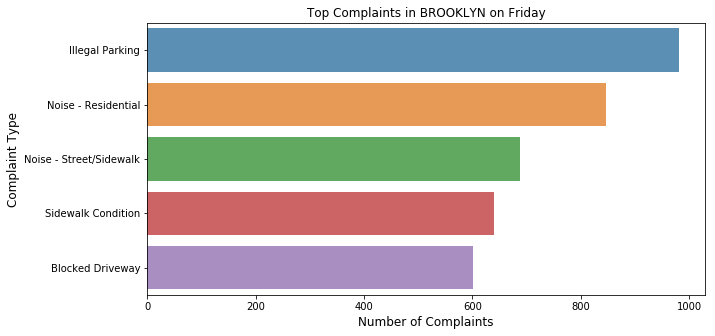

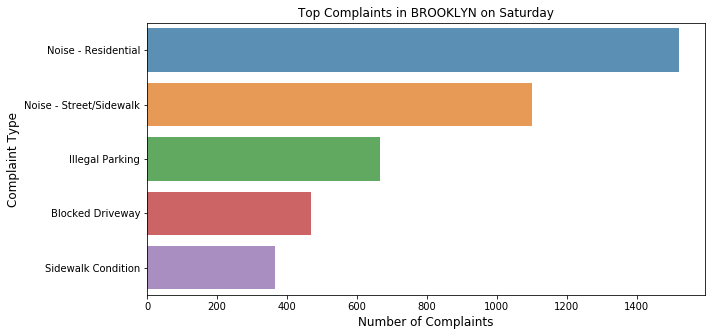

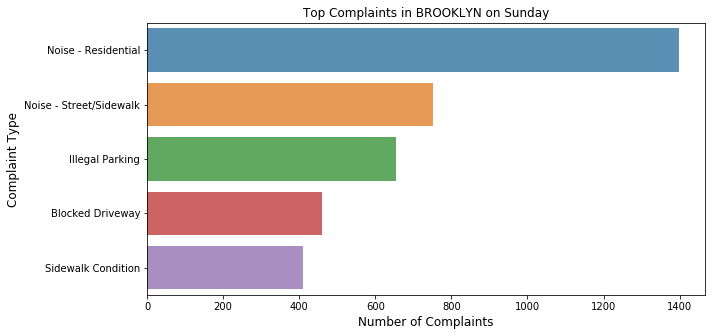

In [193]:
borough_info('BROOKLYN')

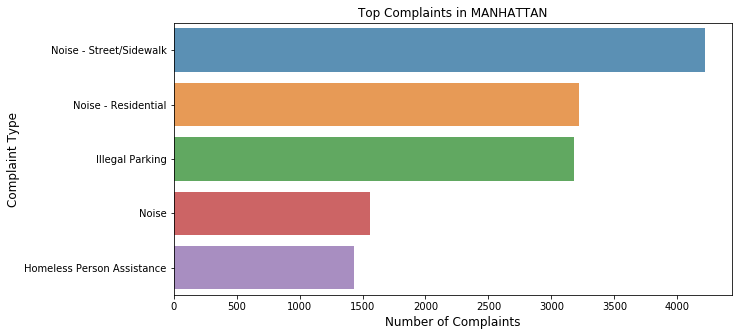

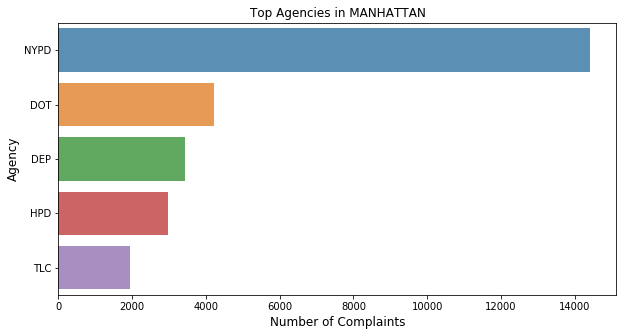

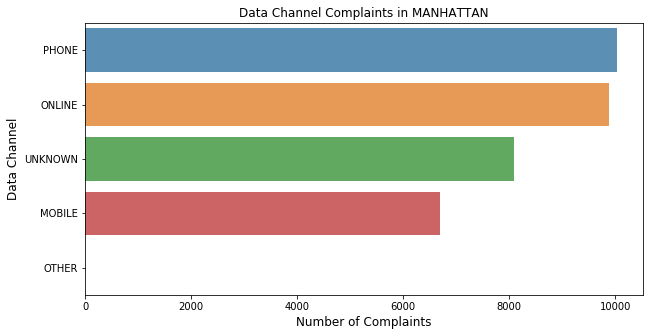

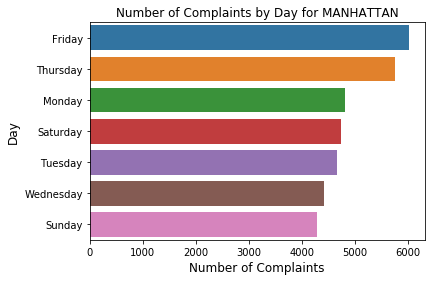

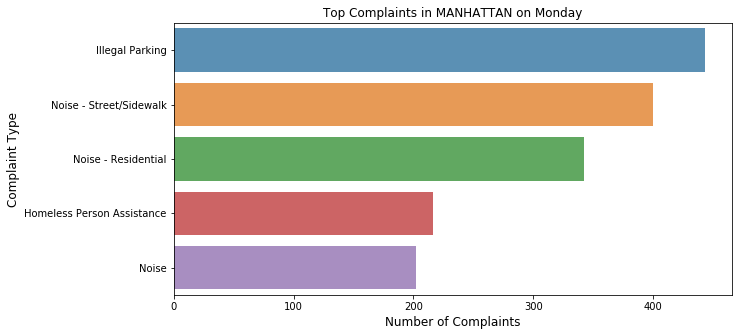

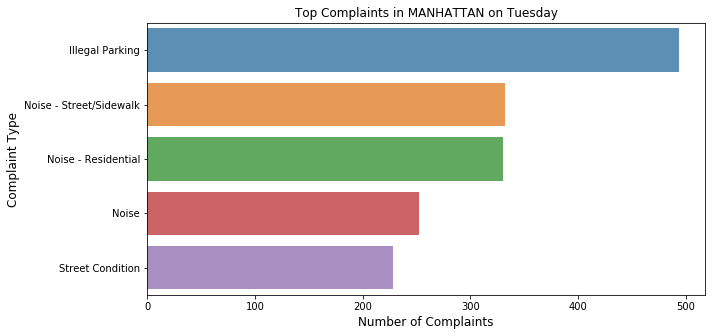

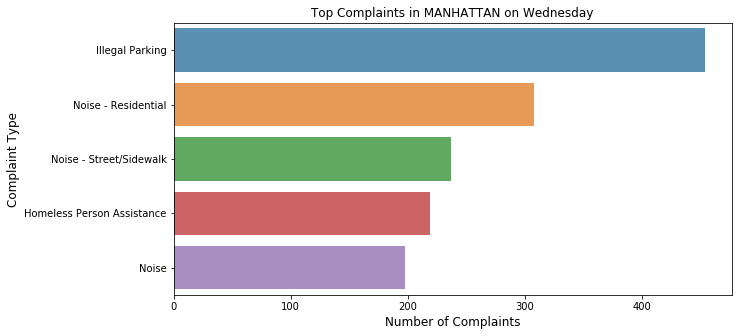

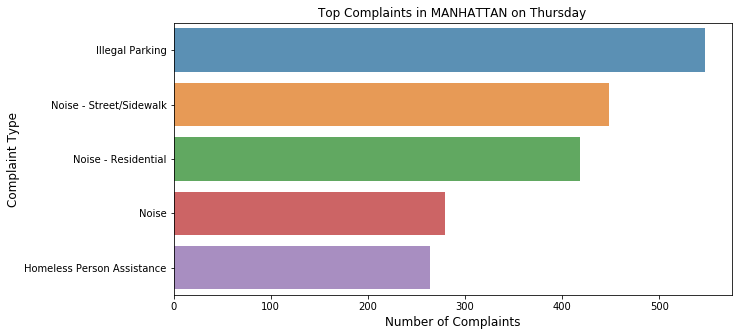

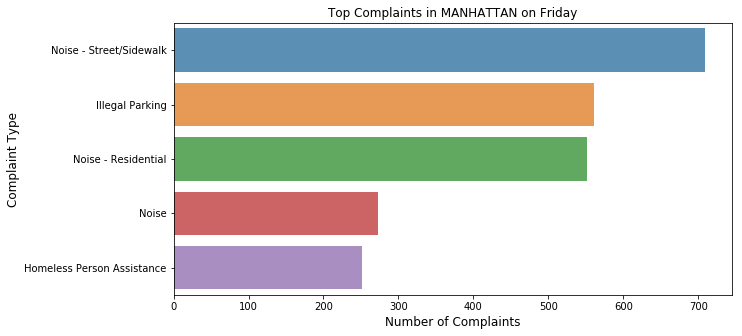

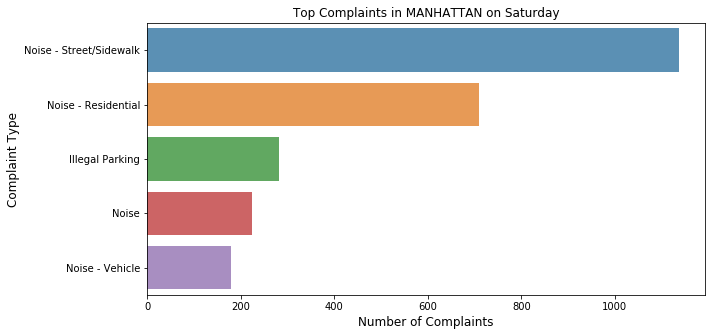

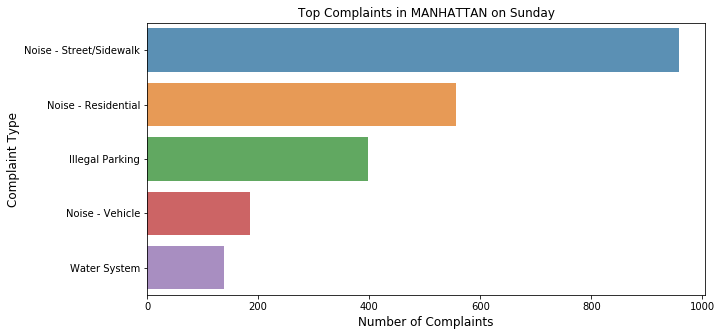

In [194]:
borough_info('MANHATTAN')